In [50]:
# Library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [51]:
# Load the data
# data file is located in folder data
df = pd.read_csv('./input/input.csv')
print(df.head(8))
print(df.tail())

   Unnamed: 0  instance_id           artist_name            track_name  \
0           0      32894.0              Röyksopp  Röyksopp's Night Out   
1           1      46652.0  Thievery Corporation      The Shining Path   
2           2      30097.0        Dillon Francis             Hurricane   
3           3      62177.0              Dubloadz                 Nitro   
4           4      24907.0           What So Not      Divide & Conquer   
5           5      89064.0            Axel Boman                 Hello   
6           6      43760.0        Jordan Comolli                 Clash   
7           7      30738.0                Hraach               Delirio   

   popularity  acousticness  danceability  duration_ms  energy  \
0        27.0       0.00468         0.652         -1.0   0.941   
1        31.0       0.01270         0.622     218293.0   0.890   
2        28.0       0.00306         0.620     215613.0   0.755   
3        34.0       0.02540         0.774     166875.0   0.700   
4  

In [52]:
df.describe()

,Unnamed: 0,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,normalized_loudness,normalized_duration_ms,normalized_popularity
count,34402.000000,34402.000000,34402.000000,34402.000000,34402.000000,3.440200e+04,34402.000000,34402.000000,34402.000000,34402.000000,34402.000000,34402.000000,34402.000000,34402.000000,34402.000000
mean,23231.399570,55913.398116,42.150427,0.337795,0.534287,2.305265e+05,0.576707,0.255625,0.189501,-10.041070,0.076311,0.435257,0.728587,0.047722,0.419902
std,14663.433215,20670.501375,14.270712,0.363592,0.182241,1.413349e+05,0.281680,0.360192,0.162422,6.618583,0.080213,0.254688,0.130313,0.029258,0.145620
min,0.000000,20002.000000,1.000000,0.000001,0.059600,-1.000000e+00,0.000792,0.000001,0.009670,-47.046000,0.022300,0.019300,0.000000,0.000000,0.000000
25%,10361.500000,38061.750000,32.000000,0.015900,0.412000,1.759832e+05,0.376000,0.000080,0.095400,-12.267000,0.035400,0.221000,0.684761,0.036431,0.316327
50%,21854.500000,55967.000000,41.000000,0.163000,0.546000,2.253195e+05,0.618000,0.009060,0.122000,-8.115500,0.045400,0.418000,0.766499,0.046644,0.408163
75%,36488.750000,73852.750000,53.000000,0.667000,0.666000,2.812000e+05,0.816000,0.595000,0.229000,-5.593000,0.074700,0.633000,0.816165,0.058212,0.530612
max,49999.000000,91758.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.939000,0.992000,1.000000,1.000000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34402 entries, 0 to 34401
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              34402 non-null  int64  
 1   instance_id             34402 non-null  float64
 2   artist_name             34402 non-null  object 
 3   track_name              34402 non-null  object 
 4   popularity              34402 non-null  float64
 5   acousticness            34402 non-null  float64
 6   danceability            34402 non-null  float64
 7   duration_ms             34402 non-null  float64
 8   energy                  34402 non-null  float64
 9   instrumentalness        34402 non-null  float64
 10  key                     34402 non-null  object 
 11  liveness                34402 non-null  float64
 12  loudness                34402 non-null  float64
 13  mode                    34402 non-null  object 
 14  speechiness             34402 non-null

   normalized_popularity  acousticness  danceability  normalized_duration_ms  \
0               0.265306       0.00468         0.652                0.000000   
1               0.306122       0.01270         0.622                0.045190   
2               0.275510       0.00306         0.620                0.044635   
3               0.336735       0.02540         0.774                0.034546   
4               0.316327       0.00465         0.638                0.046034   

   energy  instrumentalness  liveness  normalized_loudness  speechiness  \
0   0.941           0.79200     0.115             0.823883       0.0748   
1   0.890           0.95000     0.124             0.787616       0.0300   
2   0.755           0.01180     0.534             0.835381       0.0345   
3   0.700           0.00253     0.157             0.837724       0.2390   
4   0.587           0.90900     0.157             0.802914       0.0413   

   valence  
0    0.759  
1    0.531  
2    0.333  
3    0.270  
4  

<AxesSubplot:>

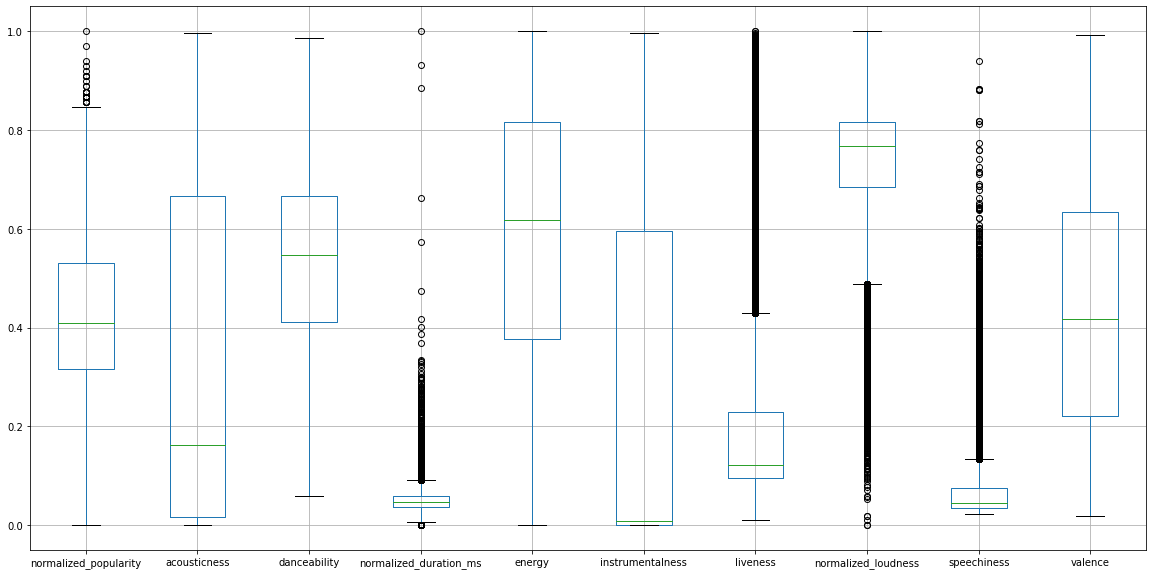

In [54]:
new_data = df[["normalized_popularity", "acousticness", "danceability", "normalized_duration_ms", "energy", "instrumentalness", "liveness", "normalized_loudness", "speechiness", "valence"]]
print(new_data.head())
plt.figure(figsize = (20, 10))
new_data.boxplot()

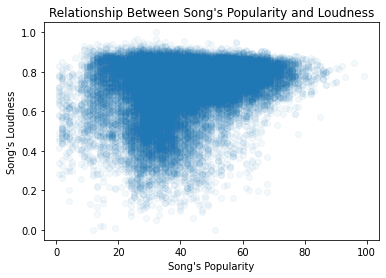

In [67]:
plt.scatter(df['popularity'], df['normalized_loudness'], alpha = 0.05)
plt.title("Relationship Between Song's Popularity and Loudness")
plt.xlabel('Song\'s Popularity')
plt.ylabel('Song\'s Loudness')
plt.show()

# with this scatter plot and the transparency, we get to examine the relationship between the song's popularity and its loudness
# from this graph we can tell that most songs with high loudness are varied from 20 to 75 percent of popularity